In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from plot_config import *

In [3]:
from utils import *

In [4]:
xg = np.load('plotting_xg.npy')
yg = np.load('plotting_yg.npy')

In [5]:
ecco_grid = xr.open_zarr('~/ECCO_transport')

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [6]:
mmp,mtb = open_case_month('salty',1)
to_mesh = -mmp['F'][0]
to_contour = mmp['count'][0]/ecco_grid.rA*1e6
for j in range(2,4):
    mmp,mtb = open_case_month('salty',j)
    to_mesh-=mmp['F'][0]
    to_contour+=mmp['count'][0]/ecco_grid.rA*1e6

In [7]:
# mp,tb = open_case('salty')


# ax = plt.axes(projection = ccrs.PlateCarree())
# plt.plot(tb.lon[90,::10000],tb.lat[90,::10000],'+')
# ax.coastlines()
# plt.xlim(-100,10)

# mvmax = 20
# mmp,mtb = open_case_month('salty',0)
# to_mesh = -mmp['F'][0]
# print(to_mesh.sum().values)
# ax = plt.axes(projection = ccrs.PlateCarree())
# for fc in [2,6,10]:
#     ct = ax.pcolormesh(xg[fc],yg[fc],to_mesh[fc],vmax = mvmax, vmin = -mvmax,cmap = 'bwr')
# ax.coastlines()

# xrange = (-46.875,-30.625)
# yrange = (44.375,53.125)
# poly = poly_from_xyrange(xrange,yrange)
# nside = 6
# xs,ys = poly.T
# xs = list(xs)+[xs[0]]
# ys = list(ys)+[ys[0]]
# for i in range(len(poly)):
#     lx = np.linspace(xs[i],xs[i+1], nside)
#     ly = np.linspace(ys[i],ys[i+1], nside)
#     # print('how')
#     ax.plot(lx,ly,transform = ccrs.PlateCarree(),c = 'gold')
# plt.xlim(-100,10)

In [8]:
ecco = xr.open_zarr('/sciserver/oceanography/ECCO_v4r4/ecco_v4r4')

In [9]:
xc,yc = np.array(ecco.XC), np.array(ecco.YC)

In [10]:
im = 12*(2006-1992)+4

ecco.time[im].values,im

(numpy.datetime64('2006-05-16T12:00:00.000000000'), 172)

In [11]:
# def mesh_contour(to_mesh, to_contour, 
#                  mvmax = 1e2,
#                  mesh_cmap = balance,
#                  cvmax = 200,
#                  clevels = 7,
#                  ccolor = 'grey',
#                  cont_cmap = cmocean.cm.deep,
#                  level_type = 'negative',
#                  colorbar_label = r'$PSU\cdot m$'
#                 ):
#     plt.figure(figsize = (16,9))
#     ax = plt.axes(projection = projection)
#     extent = (-95, 15, 30, 65)
#     ax.set_extent(extent)
#     n = 20
#     aoi = mpath.Path(
#         list(zip(np.linspace(extent[0],extent[1], n), np.full(n, extent[3]))) + \
#         list(zip(np.full(n, extent[1]), np.linspace(extent[3], extent[2], n))) + \
#         list(zip(np.linspace(extent[1], extent[0], n), np.full(n, extent[2]))) + \
#         list(zip(np.full(n, extent[0]), np.linspace(extent[2], extent[3], n)))
#     )
#     ax.set_boundary(aoi, transform=ccrs.PlateCarree())
#     if level_type == 'negative':
#         levels = np.linspace(-cvmax, 0,clevels)
#     elif level_type == 'positive':
#         levels = np.linspace(0,cvmax,clevels)
#     else:
#         levels = np.linspace(-cvmax, cvmax,clevels)

#     for fc in [2,6,10]:
#         ct = ax.pcolormesh(xg[fc],yg[fc],to_mesh[fc],vmax = mvmax, vmin = -mvmax,cmap = mesh_cmap,transform = ccrs.PlateCarree())
#     ax.tricontour(xc.ravel(),
#                   yc.ravel(),
#                   to_contour.ravel(),
#                   levels = levels,
#                   # cmap = cont_cmap,
#                   colors = ccolor,
#                   transform = ccrs.PlateCarree())
    
#     ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
#     plt.colorbar(ct,location = 'bottom',pad = 0.25,label = colorbar_label,aspect = 50,extend = 'both')
#     return ax

In [12]:
def mesh_contour(to_mesh, to_contour, ax,
                 mvmax = 1e2,
                 mesh_cmap = balance,
                 cvmax = 200,
                 clevels = 7,
                 ccolor = 'grey',
                 cont_cmap = cmocean.cm.deep,
                 level_type = 'negative',
                 colorbar_label = r'$PSU\cdot m$'
                ):
    extent = (-95, 15, 30, 65)
    ax.set_extent(extent)
    n = 20
    aoi = mpath.Path(
        list(zip(np.linspace(extent[0],extent[1], n), np.full(n, extent[3]))) + \
        list(zip(np.full(n, extent[1]), np.linspace(extent[3], extent[2], n))) + \
        list(zip(np.linspace(extent[1], extent[0], n), np.full(n, extent[2]))) + \
        list(zip(np.full(n, extent[0]), np.linspace(extent[2], extent[3], n)))
    )
    ax.set_boundary(aoi, transform=ccrs.PlateCarree())
    if level_type == 'negative':
        levels = np.linspace(-cvmax, 0,clevels)
    if level_type == 'positive':
        levels = np.linspace(0, cvmax,clevels)
    else:
        levels = np.linspace(-cvmax, cvmax,clevels)

    for fc in [2,6,10]:
        ct = ax.pcolormesh(xg[fc],yg[fc],to_mesh[fc],vmax = mvmax, vmin = -mvmax,cmap = mesh_cmap,transform = ccrs.PlateCarree(),linewidth = 0,rasterized = True)
    hey = ax.tricontour(xc.ravel(),
                  yc.ravel(),
                  to_contour.ravel(),
                  levels = levels,
                  # cmap = cont_cmap,
                  colors = ccolor,
                  transform = ccrs.PlateCarree(),linewidths = 0.7)
    # plt.clabel(hey)
    
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
    plt.colorbar(ct,location = 'left',pad = 0.03,label = colorbar_label,aspect = 10,extend = 'both',shrink = 0.5)
    return ax

In [13]:
rho0 = 1029
pe = ecco['oceFWflx']/1029*86400*1000

In [14]:
pe_mean = pe.mean(dim = 'time').persist()
pe_seas = pe.groupby('time.month').mean(dim ='time').persist()

In [15]:
pe_anom = pe.groupby('time.month') - pe_seas

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]


In [16]:
dt = (ecco.time_bnds[:,1] - ecco.time_bnds[:,0]).astype('float')

In [17]:
xrange = (-45,-32.5)
yrange = (47,52)
poly = poly_from_xyrange(xrange,yrange)
nside = 6
xs,ys = poly.T
xs = list(xs)+[xs[0]]
ys = list(ys)+[ys[0]]

In [18]:
mm = 1/25.4

In [19]:
np.linspace(0,20000,3)

array([    0., 10000., 20000.])

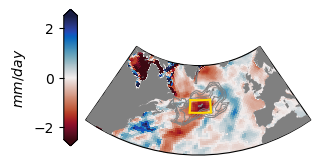

In [20]:
fig = plt.figure(figsize= (90*mm,90*mm))
ax = plt.axes(projection = projection)
to_mesh = (pe_anom*dt)[im:im+3].sum(dim = 'time')/(dt[im:im+3].sum())
to_contour = np.array(to_contour)

mesh_contour(to_mesh, to_contour,ax,mvmax = 2.5,
                  mesh_cmap = term_cmap_r,
                  level_type = 'positive',cvmax = 10,clevels = 6,
                  colorbar_label = r'$mm/day$')

for i in range(len(poly)):
    lx = np.linspace(xs[i],xs[i+1], nside)
    ly = np.linspace(ys[i],ys[i+1], nside)
    # print('how')
    ax.plot(lx,ly,transform = ccrs.PlateCarree(),c = 'gold')
# plt.xlim(-100,10)
# plt.savefig('figure6(a).png',dpi = dpi)

In [21]:
# mvmax = 5
# ax = plt.axes(projection = ccrs.PlateCarree())
# for fc in [2,6,10]:
#     ct = ax.pcolormesh(xg[fc],yg[fc],-pe_anom[im:im+2].sum(dim = 'time')[fc],vmax = mvmax, vmin = -mvmax,cmap = 'bwr')
# ax.coastlines()
# plt.xlim(-100,10)

In [22]:
those = np.where(
    np.logical_and(
        np.logical_and(xrange[0]<=xc,xrange[1]>xc),
        np.logical_and(yrange[0]<=yc,yrange[1]>yc)
    )
)

In [23]:
sfc,siy,six = [xr.DataArray(i, dims = 'to_sum') for i in those]

In [24]:
actual_area = float(ecco.rA[sfc,siy,six].sum())

In [25]:
pe_ts = (pe*ecco.rA/actual_area)[:,sfc,siy,six].sum(dim = 'to_sum').persist()
pe_seas_ts = (pe_seas*ecco.rA/actual_area)[:,sfc,siy,six].sum(dim = 'to_sum').persist()
pe_anom_ts = (pe_anom*ecco.rA/actual_area)[:,sfc,siy,six].sum(dim = 'to_sum').persist()

In [26]:
# sst_ts = ecco['THETA'][:,0,sfc,siy,six].sum(dim = 'to_sum').persist()
# sst_mean = sst_ts.mean(dim = 'time').persist()
# sst_seas = sst_ts.groupby('time.month').mean(dim ='time').persist()

In [27]:
# plt.plot(pe_ts[im-12:im+12])

In [28]:
path = '/export/scratch/wjiang33/jra55/'
evaps = sorted([i for i in os.listdir(path) if 'evp' in i])[3:]

evap_ds = [xr.open_dataset(path+file, engine = 'cfgrib') for file in evaps if 'idx' not in file]

evap = xr.concat(evap_ds,dim = 'time')

evap

precs = sorted([i for i in os.listdir(path) if 'tprat' in i])[3:]

prec_ds = [xr.open_dataset(path+file, engine = 'cfgrib') for file in precs if 'idx' not in file]

prec = xr.concat(prec_ds,dim = 'time')

jra = xr.merge([evap,prec])

In [29]:
def to_180(x, peri=360):
    """Convert any longitude scale to [-180,180)."""
    x = x % peri % peri
    # underflow resistant
    return x + (-1) * (x // (peri / 2)) * peri
ixs = xr.DataArray(np.where(np.logical_and(xrange[0]<=to_180(jra.longitude),xrange[1]>to_180(jra.longitude)))[0],dims = 'ix')
iys = xr.DataArray(np.where(np.logical_and(xrange[0]<=jra.latitude,xrange[1]>jra.latitude))[0],dims = 'iy')

cos = np.cos(jra.latitude[iys]*np.pi/180)

total = np.sum(cos)*len(ixs)

In [30]:
prec_ts = (jra.tpratsfc[:,iys,ixs]*cos).sum(dim = ('iy','ix'))/total
evap_ts = (jra.evpsfc[:,iys,ixs]  *cos).sum(dim = ('iy','ix'))/total

In [31]:
prec_seas_ts = prec_ts.groupby('time.month').mean(dim = 'time')
evap_seas_ts = evap_ts.groupby('time.month').mean(dim = 'time')
prec_seas_std = prec_ts.groupby('time.month').std(dim = 'time')
evap_seas_std = evap_ts.groupby('time.month').std(dim = 'time')

pe_seas_ts  = (prec_ts - evap_ts).groupby('time.month').mean(dim = 'time')
pe_seas_std = (prec_ts - evap_ts).groupby('time.month').std(dim = 'time')

In [32]:
# evap_mean = np.roll(np.array(evap_seas_ts), -month)
# evap_mean.shape

In [33]:
jra_time = jra.time[im-12:im+12]
ecco_time = ecco.time[im-12:im+12]
time = ecco_time
month = im%12
prec_mean = np.roll(np.array(prec_seas_ts), -month)
prec_mean = np.concatenate ([prec_mean,prec_mean])
prec_std =  np.roll(np.array(prec_seas_std), -month)
prec_std =  np.concatenate ([prec_std,prec_std])

evap_mean = np.roll(np.array(evap_seas_ts), -month)
evap_mean = np.concatenate ([evap_mean,evap_mean])
evap_std =  np.roll(np.array(evap_seas_std), -month)
evap_std =  np.concatenate ([evap_std,evap_std])

pe_mean = np.roll(np.array(pe_seas_ts), -month)
pe_mean = np.concatenate ([pe_mean,pe_mean])
pe_std =  np.roll(np.array(pe_seas_std), -month)
pe_std =  np.concatenate ([pe_std,pe_std])

In [34]:
prec_c = 'darkblue'
evap_c = 'brown'
pe_c = 'cyan'

mean_ls = ':'

In [35]:
def jra_plot(ax):
    handles = []
    labels = []
    
    seas, = ax.plot(time,prec_mean,ls = mean_ls,c = prec_c)
    tv,   = ax.plot(time,prec_ts[im-12:im+12],c = prec_c)
    spread= ax.fill_between(time,prec_mean-prec_std,prec_mean+prec_std,alpha = 0.2,color = prec_c)
    handles+=[tv,(seas,spread)]
    labels+= ['Precipitation','Seasonality and Spread']
    
    seas, = ax.plot(time,-evap_mean,ls = mean_ls,c = evap_c)
    tv,   = ax.plot(time,-evap_ts[im-12:im+12],c = evap_c)
    spread= ax.fill_between(time,-evap_mean-evap_std,-evap_mean+evap_std,alpha = 0.2,color = evap_c)
    handles+=[tv,(seas,spread)]
    labels+= ['-Evaporation','Seasonality and Spread']
    
    seas, = ax.plot(time,pe_mean,ls = mean_ls,c = pe_c)
    tv,   = ax.plot(time,prec_ts[im-12:im+12]-evap_ts[im-12:im+12],c = pe_c)
    spread= ax.fill_between(time,pe_mean-pe_std,pe_mean+pe_std,alpha = 0.2,color = pe_c)
    handles+=[tv,(seas,spread)]
    labels+= ['P-E','Seasonality and Spread']
    
    ecco_line, = ax.plot(ecco.time[im-12: im+12],pe_ts[im-12:im+12],c = color_dic['F'])
    handles.append(ecco_line)
    labels.append('ECCO P-E')
    
    ysize = 7
    ax.fill_betweenx([-ysize,ysize],
                      [jra.time[im].values,jra.time[im].values],
                      [jra.time[im+3].values,jra.time[im+3].values],
                      **fill_betweenx_kwarg
                     )
    
    plt.xticks(rotation = 30)
    ax.set_xlim(time[0],time[-1])
    ax.legend(labels = labels,handles = handles,fontsize = 6,loc = 'upper center',ncol = 4)
    ax.set_ylim(-ysize,ysize)
    ax.set_ylabel(r'$mm/day$')
    # plt.savefig('figure6(b).png',dpi = dpi)

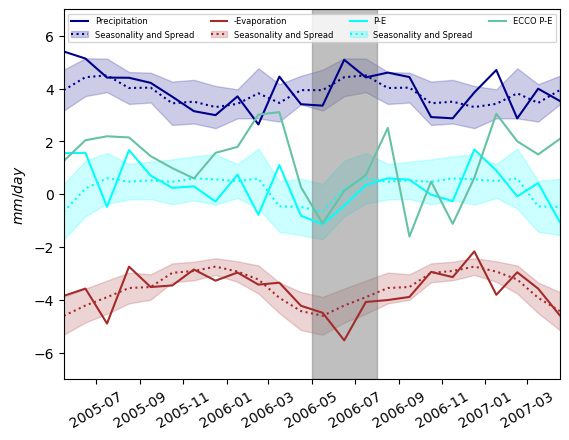

In [36]:
ax = plt.axes()
jra_plot(ax)

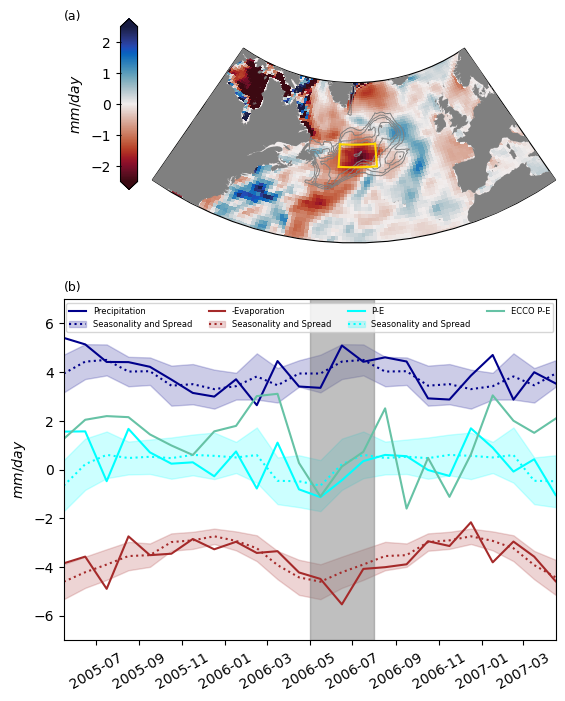

In [38]:
fig = plt.figure(figsize= (150*mm,200*mm))
ax = plt.subplot(2,1,1,projection = projection)
to_mesh = (pe_anom*dt)[im:im+3].sum(dim = 'time')/(dt[im:im+3].sum())
to_contour = np.array(to_contour)

mesh_contour(to_mesh, to_contour,ax,mvmax = 2.5,
                  mesh_cmap = term_cmap_r,
                  level_type = 'positive',cvmax = 10,clevels = 6,
                  colorbar_label = r'$mm/day$')
ax.set_title('(a)',loc = 'left',fontsize = 9,x = -0.22)

for i in range(len(poly)):
    lx = np.linspace(xs[i],xs[i+1], nside)
    ly = np.linspace(ys[i],ys[i+1], nside)
    # print('how')
    ax.plot(lx,ly,transform = ccrs.PlateCarree(),c = 'gold')

ax2 = plt.subplot(2,1,2)
jra_plot(ax2)
ax2.set_title('(b)',loc = 'left',fontsize = 9)
plt.tight_layout()

plt.savefig('dry2006.pdf',dpi = 300)